# **Bank Customer Churn Model**

## **Objective**

Develop a model to predict customer churn using machine learning techniques.

## **Data Source**

Dataset: Bank Customer Churn Dataset.

## **Import Library**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## **Import Data**

In [5]:
# Load dataset
churn_data = pd.read_csv('Bank Churn Modelling.csv')

## **Describe Data**

In [6]:
# Overview of the dataset
churn_data.info()
churn_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn_data.duplicated('CustomerId').sum()

0

In [9]:
churn_data = churn_data.set_index('CustomerId')

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [11]:
churn_data.head(3)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


# **Data Preprocessing**

# **Encoding**

In [12]:
churn_data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
churn_data.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [14]:
churn_data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
churn_data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [16]:
churn_data['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [17]:
churn_data.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [18]:
churn_data['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [19]:
churn_data['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [20]:
churn_data.loc[churn_data['Balance']==0, 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [21]:
churn_data['Zero Balance'] = np.where(churn_data['Balance']>0,1,0)

## **Data Visualization**

<Axes: >

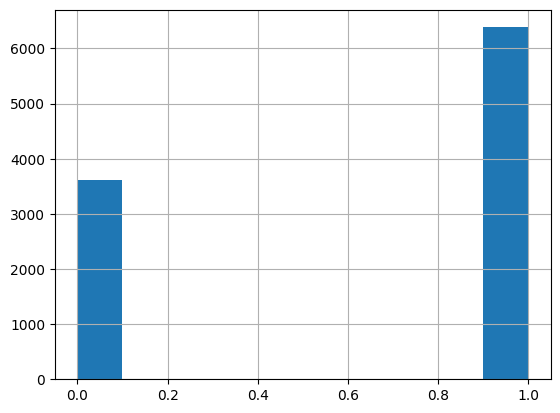

In [22]:
churn_data['Zero Balance'].hist()

In [23]:
churn_data.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [24]:
churn_data.groupby(['Churn','Gender']).count()

Surname  CreditScore  Geography   Age  Tenure  Balance  \
Churn Gender                                                           
0     0          4559         4559       4559  4559    4559     4559   
      1          3404         3404       3404  3404    3404     3404   
1     0           898          898        898   898     898      898   
      1          1139         1139       1139  1139    1139     1139   

              Num Of Products  Has Credit Card  Is Active Member  \
Churn Gender                                                       
0     0                  4559             4559              4559   
      1                  3404             3404              3404   
1     0                   898              898               898   
      1                  1139             1139              1139   

              Estimated Salary  Zero Balance  
Churn Gender                                  
0     0                   4559          4559  
      1                   3404          3404  
1     0                    898           898  
      1                   1139          1139

In [25]:
churn_data.groupby(['Churn','Has Credit Card']).count()

Surname  CreditScore  Geography  Gender   Age  Tenure  \
Churn Has Credit Card                                                          
0     0                   2332         2332       2332    2332  2332    2332   
      1                   5631         5631       5631    5631  5631    5631   
1     0                    613          613        613     613   613     613   
      1                   1424         1424       1424    1424  1424    1424   

                       Balance  Num Of Products  Is Active Member  \
Churn Has Credit Card                                               
0     0                   2332             2332              2332   
      1                   5631             5631              5631   
1     0                    613              613               613   
      1                   1424             1424              1424   

                       Estimated Salary  Zero Balance  
Churn Has Credit Card                                  
0     0                            2332          2332  
      1                            5631          5631  
1     0                             613           613  
      1                            1424          1424

## **Define Target Variable (y) and Feature Variables (X)**

In [26]:
churn_data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [27]:
y=churn_data['Churn']
x=churn_data.drop(['Churn','Surname'],axis=1)

In [28]:
x.shape , y.shape

((10000, 11), (10000,))

## **Handling Imbalance Data**

*   Random Under Sampling
*   Random Over Sampling





*   Random Under Sampling



In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y)

In [31]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [32]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [33]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

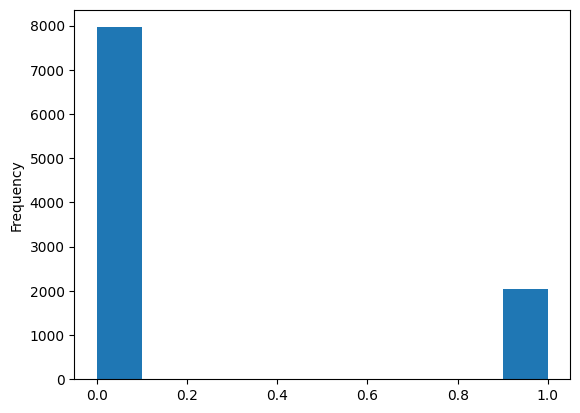

In [34]:
y.plot(kind='hist')

<Axes: ylabel='Frequency'>

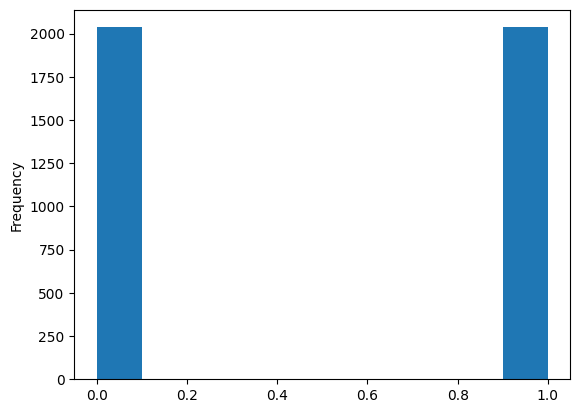

In [35]:
y_rus.plot(kind='hist')



*   Random Over Sampling




In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [38]:
x_ros.shape, y_ros.shape , x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [39]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [40]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

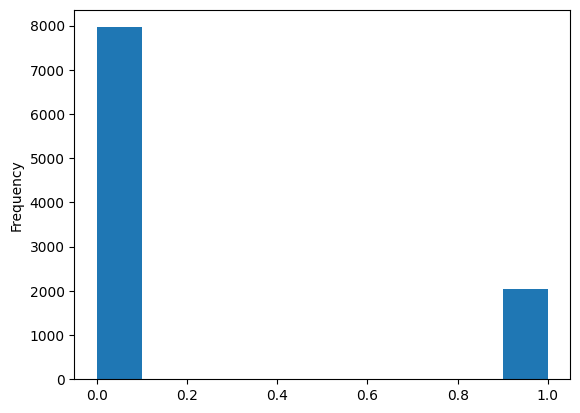

In [41]:
y.plot(kind='hist')

<Axes: ylabel='Frequency'>

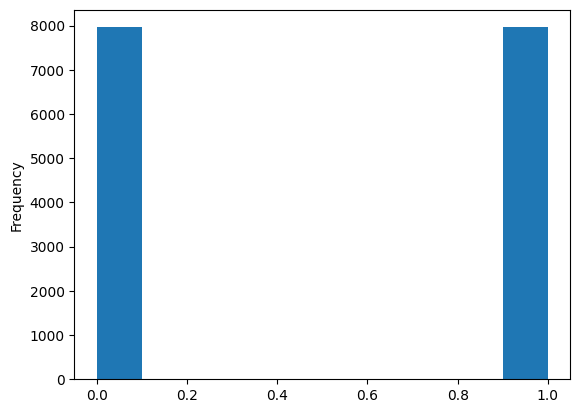

In [42]:
y_ros.plot(kind='hist')

# **Train Test Split**

In [43]:
from sklearn.model_selection import train_test_split

**Split Original Data**

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2, random_state=42)

**Split Random Under Sampling Data**

In [45]:
x_rus_train,x_rus_test,y_rus_train,y_rus_test= train_test_split(x_rus, y_rus, test_size = 0.2, random_state=42)

**Split Random Over Sampling Data**

In [46]:
x_ros_train,x_ros_test,y_ros_train,y_ros_test= train_test_split(x_ros, y_ros, test_size = 0.2, random_state=42)

## **Data Preprocessing**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

**Standardize Original Data**

In [49]:
x_train[['CreditScore','Age','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Balance','Estimated Salary']])
x_test[['CreditScore','Age','Balance','Estimated Salary']] = sc.transform(x_test[['CreditScore','Age','Balance','Estimated Salary']])

**Standardize Random Under Sampling**

In [50]:
x_rus_train[['CreditScore','Age','Balance','Estimated Salary']] = sc.fit_transform(x_rus_train[['CreditScore','Age','Balance','Estimated Salary']])
x_rus_test[['CreditScore','Age','Balance','Estimated Salary']] = sc.transform(x_rus_test[['CreditScore','Age','Balance','Estimated Salary']])

**Standardize Random Over Sampling**

In [51]:
x_ros_train[['CreditScore','Age','Balance','Estimated Salary']] = sc.fit_transform(x_ros_train[['CreditScore','Age','Balance','Estimated Salary']])
x_ros_test[['CreditScore','Age','Balance','Estimated Salary']] = sc.transform(x_ros_test[['CreditScore','Age','Balance','Estimated Salary']])

## **Support Vector Machine Classifier**

In [52]:
from sklearn.svm import SVC

In [53]:
svc=SVC()

In [54]:
svc.fit(x_train,y_train)

SVC()

In [55]:
y_pred=svc.predict(x_test)

# **Model Accuary**

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
confusion_matrix(y_test,y_pred)

array([[1600,    7],
       [ 350,   43]])

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1607
           1       0.86      0.11      0.19       393

    accuracy                           0.82      2000
   macro avg       0.84      0.55      0.55      2000
weighted avg       0.83      0.82      0.76      2000



## **Hyperparameter Tuning**

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [61]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2,cv= 2)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [62]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [63]:
grid_predictions = grid.predict(x_test)

In [64]:
confusion_matrix(y_test, grid_predictions)

array([[1481,  126],
       [ 288,  105]])

In [65]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1607
           1       0.45      0.27      0.34       393

    accuracy                           0.79      2000
   macro avg       0.65      0.59      0.61      2000
weighted avg       0.76      0.79      0.77      2000



**Model with Random Under Sampling**

In [66]:
svc_rus = SVC()
svc_rus.fit(x_rus_train, y_rus_train)

SVC()

In [67]:
y_pred_rus = svc_rus.predict(x_rus_test)

In [68]:
confusion_matrix(y_rus_test,y_pred_rus)

array([[314, 129],
       [ 97, 275]])

In [69]:
print(classification_report(y_rus_test,y_pred_rus))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       443
           1       0.68      0.74      0.71       372

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.73      0.72      0.72       815



## **Hyperparameter Tuning For RUS**

In [70]:
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [71]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2,cv= 2)
grid_rus.fit(x_rus_train, y_rus_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [72]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [73]:
grid_predictions_rus = grid_rus.predict(x_rus_test)

In [74]:
confusion_matrix(y_rus_test, grid_predictions_rus)

array([[322, 121],
       [102, 270]])

In [75]:
print(classification_report(y_rus_test, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       443
           1       0.69      0.73      0.71       372

    accuracy                           0.73       815
   macro avg       0.72      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



**Model with Random Over Sampling**

In [76]:
svc_ros = SVC()
svc_ros.fit(x_ros_train, y_ros_train)

SVC()

In [77]:
y_pred_ros = svc_ros.predict(x_ros_test)

In [78]:
confusion_matrix(y_ros_test,y_pred_ros)

array([[1177,  456],
       [ 384, 1169]])

In [79]:
print(classification_report(y_ros_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1633
           1       0.72      0.75      0.74      1553

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186



## **Hyperparameter Tuning For ROS**

In [80]:
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}

In [81]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2,cv= 2)
grid_ros.fit(x_ros_train, y_ros_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [82]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [83]:
grid_predictions_ros = grid_ros.predict(x_ros_test)

In [84]:
confusion_matrix(y_ros_test, grid_predictions_ros)

array([[1477,  156],
       [  39, 1514]])

In [85]:
print(classification_report(y_ros_test, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1633
           1       0.91      0.97      0.94      1553

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.94      0.94      0.94      3186



# **Let's Compare**

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1607
           1       0.86      0.11      0.19       393

    accuracy                           0.82      2000
   macro avg       0.84      0.55      0.55      2000
weighted avg       0.83      0.82      0.76      2000



In [87]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1607
           1       0.45      0.27      0.34       393

    accuracy                           0.79      2000
   macro avg       0.65      0.59      0.61      2000
weighted avg       0.76      0.79      0.77      2000



In [88]:
print(classification_report(y_rus_test,y_pred_rus))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       443
           1       0.68      0.74      0.71       372

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.73      0.72      0.72       815



In [89]:
print(classification_report(y_rus_test, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       443
           1       0.69      0.73      0.71       372

    accuracy                           0.73       815
   macro avg       0.72      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



In [90]:
print(classification_report(y_ros_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1633
           1       0.72      0.75      0.74      1553

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186



In [91]:
print(classification_report(y_ros_test, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1633
           1       0.91      0.97      0.94      1553

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.94      0.94      0.94      3186



## **Explanation**

This project aims to predict bank customer churn using logistic regression. The dataset includes customer demographics, account details, and churn status. We start by exploring and visualizing the data to understand its structure and distribution. During preprocessing, unnecessary columns are removed, categorical variables are encoded, and numerical features are scaled. The dataset is split into features (X) and target (y), and then into training and testing sets. A logistic regression model is trained and evaluated using a confusion matrix, accuracy score, and classification report. The trained model is used to predict churn on new data, providing a clear, step-by-step approach to building and evaluating a churn prediction model.